In [1]:
import cv2
import pandas as pd

In [2]:
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg'

In [7]:
# options={
#     'model':'cfg/yolo.cfg',
#     'load':'bin/yolov2.weights',
#     'threshold':0.3, # threshold for confidence factor
#     #'gpu' : 1.0
# }
options={
    'model':'cfg/tiny-yolo-voc-1c.cfg',
    'load':875,
    'threshold':0.045, 
#     'gpu':1.0
}
tfnet=TFNet(options)

Parsing cfg/tiny-yolo-voc-1c.cfg
Loading None ...
Finished in 0.0s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 13, 13, 256)
 Init  |

In [8]:
img=cv2.imread(r'C:\Users\mayan\Desktop\pothole1.png',cv2.IMREAD_COLOR)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
running=tfnet.return_predict(img)

In [9]:
result=running
result

[{'label': 'pothole',
  'confidence': 0.056580566,
  'topleft': {'x': 205, 'y': 1},
  'bottomright': {'x': 282, 'y': 47}},
 {'label': 'pothole',
  'confidence': 0.076072864,
  'topleft': {'x': 273, 'y': 0},
  'bottomright': {'x': 353, 'y': 48}},
 {'label': 'pothole',
  'confidence': 0.05970344,
  'topleft': {'x': 200, 'y': 0},
  'bottomright': {'x': 425, 'y': 104}},
 {'label': 'pothole',
  'confidence': 0.052411765,
  'topleft': {'x': 0, 'y': 0},
  'bottomright': {'x': 701, 'y': 130}},
 {'label': 'pothole',
  'confidence': 0.07177258,
  'topleft': {'x': 345, 'y': 1},
  'bottomright': {'x': 418, 'y': 46}},
 {'label': 'pothole',
  'confidence': 0.05704978,
  'topleft': {'x': 147, 'y': 0},
  'bottomright': {'x': 609, 'y': 461}},
 {'label': 'pothole',
  'confidence': 0.059551936,
  'topleft': {'x': 418, 'y': 3},
  'bottomright': {'x': 482, 'y': 43}},
 {'label': 'pothole',
  'confidence': 0.058053114,
  'topleft': {'x': 492, 'y': 3},
  'bottomright': {'x': 551, 'y': 42}},
 {'label': 'pothol

In [67]:
labels=pd.read_csv(r'C:/Users/mayan/Desktop/trainLabels.csv')

In [68]:
# index=[]
# for i in range(1,1000):
#     path=r'C:/Users/mayan/Desktop/train/'
#     print(i)
#     img=cv2.imread(path+str(i)+'.png',cv2.IMREAD_COLOR)
#     img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#     running=tfnet.return_predict(img)
#     if(running!=[]):
#         if(running[0]['label']==labels['label'][i-1]):
#             index.append(i)

In [69]:
# index

In [70]:

for i in result:
    tl=(i['topleft']['x'],i['topleft']['y'])
    br=(i['bottomright']['x'],i['bottomright']['y'])
    img=cv2.rectangle(img,tl,br,(0,255,0), 1)  # rectangle(image, topleft, bottomright, color, pixel thickness)

In [71]:
img_cropped=img[tl[1]:br[1],tl[0]:br[0]]


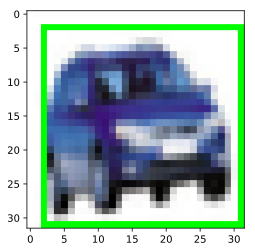

In [72]:
plt.imshow(img)
plt.show()

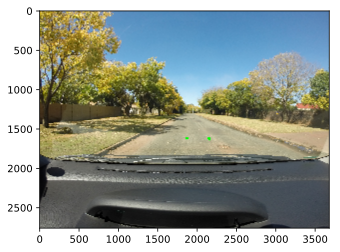

In [15]:
plt.imshow(img)
plt.show()

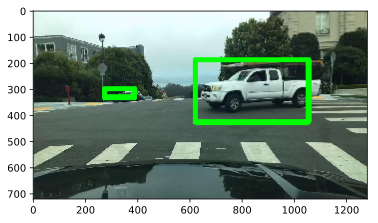

In [87]:
plt.imshow(img)
plt.show()

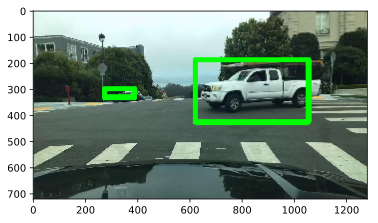

In [88]:
plt.imshow(img)
plt.show()

In [89]:
img_gray=cv2.cvtColor(img_cropped,cv2.COLOR_BGR2GRAY)

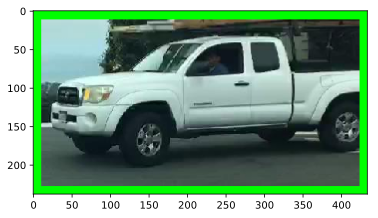

In [90]:
plt.imshow(img_cropped)
# plt.show()

In [91]:
cv2.imwrite('cropped.jpg',img_cropped)

True

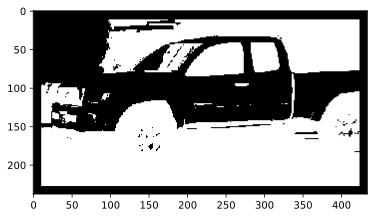

In [92]:
import cv2
img = cv2.imread('cropped.jpg', 0)
cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU,img)
contours, hier = cv2.findContours(img, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
plt.imshow(img, cmap='Greys',  interpolation='nearest')

In [93]:
cv2.imwrite('cropped.jpg',img)

True

In [94]:
# d=0
# for ctr in contours:
#     # Get bounding box
#     x, y, w, h = cv2.boundingRect(ctr)
#     # Getting ROI
#     image=img
#     roi = image[y:y+h, x:x+w]

#     cv2.imshow('character: %d'%d,roi)
#     cv2.imwrite('character_%d.png'%d, roi)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
#     d+=1

In [11]:
result=[{'label': 'pothole',
  'confidence': 0.7,
  'topleft': {'x':353 , 'y':71 },
  'bottomright': {'x': 417, 'y': 364}},{'label': 'automobile',
  'confidence': 0.87,
  'topleft': {'x': 396, 'y': 587},
  'bottomright': {'x': 476, 'y': 795}}]

In [15]:
result=[{'label': 'pothole',
  'confidence': 0.7,
  'topleft': {'x':71 , 'y':353 },
  'bottomright': {'x': 364, 'y': 417}},{'label': 'automobile',
  'confidence': 0.87,
  'topleft': {'x': 587, 'y': 396},
  'bottomright': {'x': 795, 'y': 476}}]

In [16]:

for i in result:
    tl=(i['topleft']['x'],i['topleft']['y'])
    br=(i['bottomright']['x'],i['bottomright']['y'])
    img=cv2.rectangle(img,tl,br,(0,255,0), 1)  # rectangle(image, topleft, bottomright, color, pixel thickness)

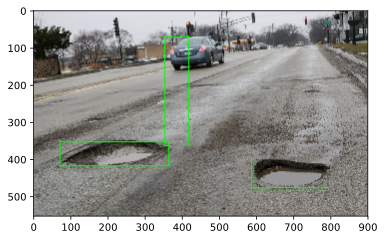

In [17]:
plt.imshow(img)